In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from tqdm import tqdm
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import tensorflow as tf
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [2]:
""" One v.s. All binary classification """

' One v.s. All binary classification '

In [3]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [4]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [5]:
""" SVM - Linear Classification  """

' SVM - Linear Classification  '

In [12]:
def run_model(model_type = "LR", neighbours = 5):
    playlists = []
    result_history = {}

    np.random.seed(123)

    for playlist in tqdm(range(100,101,1), desc = "Progress : ", position = 0, leave = True):
        X = []
        y = []
        list_of_is = []
        for i in df.index:
            a = list(df.iloc[i])[1:-1]
            if playlist in eval(df['Playlists'][i]):
                X.append(a)
                y.append(1)
            else:
                _ = np.random.randint(0, 26)
                if _ == 0:
                    X.append(a)
                    y.append(0)



        X = np.array(X)
        y = np.array(y)



        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)

        standardScalar = StandardScaler()
        X_train = standardScalar.fit_transform(X_train)
        X_test = standardScalar.transform(X_test)
        
        
        if(model_type == "LR" ):
            model = LogisticRegression()
            
        elif(model_type == "SVM"):
            model = SVC(kernel = 'linear')
        
        elif (model_type == "DT"):
            model = DecisionTreeClassifier(criterion = 'entropy', max_depth =  20)
            
        elif (model_type == "RF"):
            model = RandomForestClassifier(criterion = 'entropy')
            
        
        elif(model_type == "XGB"):
            
            param = {
                "learning_rate" : 0.1,
                "n_estimators" : 500,
                "max_depth" : 20,
                "min_child_weight" : 1,
                "gamma" : 0.1,
                "subsample": 0.9,
                "colsample_bytree" : 0.9,
                "objective" : 'binary:logistic',
                "nthread" : 4,
                "scale_pos_weight" :  1,
                "seed" : 27
            }
            
            model = XGBClassifier(**param)
        
        elif(model_type == "KNN"):
            model = KNeighborsClassifier(n_neighbors=neighbours)
            
        elif(model_type == "ANN"):
            model = Sequential([Dense(units = 24, input_shape = (34, ), activation = 'relu'),
            Dense(units = 12, activation = 'relu'),
            Dense(units = 4, activation = 'relu'),       
            Dense(units = 1, activation = 'sigmoid')
            ])
            model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])
            model.summary()
            
            
#         fig, axes = plt.subplots(3, 2, figsize=(10, 15))


#         cv = 5
#         title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
#         plot_learning_curve(model, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
#                             cv=cv)
                            
                        
       

#         plt.show()


            
        train_sizes, train_f1_scores, val_f1_scores = learning_curve(model, X_train, y_train, cv = 5, train_sizes =[30, 60, 90, 120, 150, 180, 210, 240, 270], scoring = 'f1_macro')
        print(train_sizes)
#         print(train_f1_scores.shape)
        print(train_f1_scores)
        print(val_f1_scores)
        
        print("yoyoyo")
        
        print(len(X), "yoyoyo")
        
        
        train_f1_scores_mean = np.mean(train_f1_scores, axis=1)
        train_f1_scores_std = np.std(train_f1_scores, axis=1)
        val_f1_scores_mean = np.mean(val_f1_scores, axis=1)
        val_f1_scores_std = np.std(val_f1_scores, axis=1)
        
        print(train_f1_scores_mean)
        print(val_f1_scores_mean)
        
        
        plt.plot([30, 60, 90, 120, 150, 180, 210, 240, 270], train_f1_scores_mean, "b-", label = "Training Score")
        plt.plot([30, 60, 90, 120, 150, 180, 210, 240, 270], val_f1_scores_mean, "r-", label = "Validation Score")
        plt.title("Linear SVC")
        plt.xlabel("Number of training samples")
        plt.ylabel("F1 Score (Macro)")
        plt.legend()
        plt.grid()
        plt.show()
        
        
#         print("Training F1:", train_f1_scores.mean())
#         print("Validation F1:", val_f1_scores.mean())
        
        
#         train_sizes, train_prec_scores, val_prec_scores = learning_curve(model, X_train, y_train, cv = 5, train_sizes =[30, 60, 90, 120, 150, 180, 210, 240, 270], scoring = 'precision_macro')
#         print(train_prec_scores)
#         print(val_prec_scores)
#         print("Training Precision:", train_prec_scores.mean())
#         print("Validation Precision:", val_prec_scores.mean())
        
#         train_sizes, train_rec_scores, val_rec_scores = learning_curve(model, X_train, y_train, cv = 5, train_sizes =[30, 60, 90, 120, 150, 180, 210, 240, 270], scoring = 'recall_macro')
#         print(train_rec_scores)
#         print(val_rec_scores)
#         print("Training Recall:", train_rec_scores.mean())
#         print("Validation Recall:", val_rec_scores.mean())
        
        


#         xgb = XGBClassifier(**param)    
        
        if model_type != 'ANN':
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            if model_type == 'SVM':
                plot_roc_curve(model, X_test, y_test)
                plt.grid()
                plt.plot(color = 'g-')
                plt.show()
        else:
            model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 20)
            y_pred = model.predict_classes(X_test)
            

        pres_score = precision_score(y_test, y_pred, average = "macro")

        f1= f1_score(y_test, y_pred, average = "macro")
        recall_Score = recall_score(y_test, y_pred, average = "macro")

        result_history[playlist] = {"Precision Score " : pres_score, "Recall Score " : recall_Score, "F1 Score " : f1 }


    print(result_history)
    return result_history

In [ ]:
""" Logistic Regression Result"""

In [ ]:
result_history = run_model(model_type = "LR")

In [ ]:
""" Decision Tree Result"""

In [ ]:
result_history = run_model(model_type = "DT")

In [ ]:
""" Random Forest Result"""

In [ ]:
result_history = run_model(model_type = "RF")

In [ ]:
""" XG Boost Result"""

In [ ]:
result_history = run_model(model_type = "XGB")

In [ ]:
result_history

KNN Classification

In [ ]:
n_neighbours = 13

In [ ]:
result_history = run_model(model_type = "KNN", neighbours = n_neighbours)

ANN Classification (Deep Learning)

In [ ]:
result_history = run_model(model_type = "ANN")

Progress :   0%|          | 0/1 [00:00<?, ?it/s]

[ 30  60  90 120 150 180 210 240 270]
[[1.         1.         1.         1.         1.        ]
 [0.95555556 1.         1.         1.         1.        ]
 [0.96527778 1.         1.         1.         1.        ]
 [0.95587695 1.         0.98583402 0.98583402 0.98583402]
 [0.96660482 1.         0.97862639 0.97862639 0.97862639]
 [0.97249249 0.99061278 0.98144712 0.98186946 0.98186946]
 [0.97565217 0.99170976 0.98359631 0.97457525 0.97457525]
 [0.97727201 0.992424   0.97772208 0.97166804 0.97166804]
 [0.97124294 0.97821351 0.97180451 0.96636688 0.98115008]]
[[0.75086806 0.92234848 0.95920398 0.93699767 0.88317308]
 [0.89527458 0.92234848 0.95920398 0.93699767 0.90486258]
 [0.89527458 0.94033471 0.97905492 0.93699767 0.94016252]
 [0.91386555 0.88352273 0.91840796 0.88888889 0.93699767]
 [0.91386555 0.90055785 0.94033471 0.91364606 0.94016252]
 [0.93716475 0.92234848 0.92234848 0.91364606 0.94016252]
 [0.93716475 0.92234848 0.95920398 0.88888889 0.91818182]
 [0.91840796 0.83681592 0.9184079

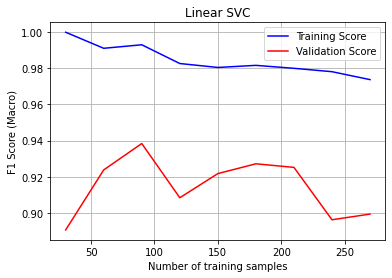

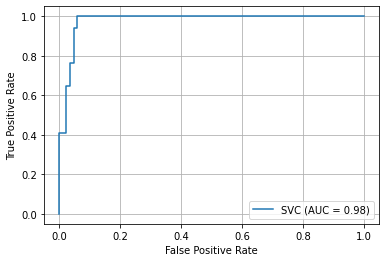

Progress : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

{100: {'Precision Score ': 0.8863636363636364, 'Recall Score ': 0.9705882352941176, 'F1 Score ': 0.9207459207459208}}


In [13]:
result_history = run_model(model_type = "SVM")